# Importation des bibliothèques

In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
%load_ext autoreload
%autoreload 2
from modele import Module_lineare
from modele import Module
from sequentiel import Sequentiel , Optim
from loss  import MSELoss,BCELoss
import utils as ut
import numpy as np
import matplotlib.pyplot as plt

import non_lineaire as nl
from sklearn.model_selection import train_test_split

In [3]:

uspsdatatrain = "./data/USPS_train.txt"
uspsdatatest = "./data/USPS_test.txt"
alltrainx,alltrainy = ut.load_usps(uspsdatatrain)
alltestx,alltesty = ut.load_usps(uspsdatatest)
neg = 6
pos = 9
datax,datay = ut.get_usps([neg,pos],alltrainx,alltrainy)
testx,testy = ut.get_usps([neg,pos],alltestx,alltesty)


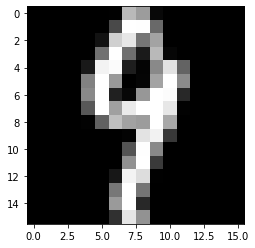

In [5]:
ut.show_usps(datax[datay==9][0])

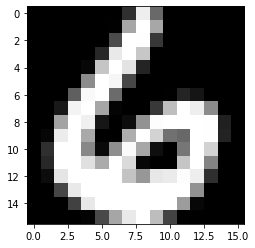

In [6]:
ut.show_usps(datax[datay==6][0])

In [7]:
datay.reshape(1,1308).shape

(1, 1308)

In [8]:
datax.shape

(1308, 256)

## Entraitenement : 

In [9]:
# Convertir en -1 ET 1  
datay_adapted = np.where(datay==6,0,1)
print("Classe 9 :",len(datay_adapted[datay_adapted==1]))
print("Classe 6 :",len(datay_adapted[datay_adapted==0]))

Classe 9 : 644
Classe 6 : 664


In [24]:
# Fonction de coût 
loss = MSELoss()

# Prametres de l'optimiser
batch_size = 20
epochs = 1000
eps = 1e-3

module1 = Module_lineare(input_size=256, output_size=100,biais=True)
activation_tanh = nl.TanH()
module2 = Module_lineare(input_size=100, output_size=10,biais=True)
activation_tanh_2 = nl.TanH()

module3 = Module_lineare(input_size=10, output_size=100,biais=True)
activation_tanh_3 = nl.TanH()
module4 = Module_lineare(input_size=100, output_size=256,biais=True)
activation_sigmoide = nl.Sigmoide()

encodeur = Sequentiel([module1 , activation_tanh , module2 ,activation_tanh_2,module3 , activation_tanh_3 , module4 ,activation_sigmoide])
# decodeur = Sequentiel([module3 , activation_tanh_3 , module4 ,activation_sigmoide])



In [25]:

optimiser = Optim(encodeur , loss , eps = eps)
losses = optimiser.SGD(datax , datax , batch_size , epochs)




In [27]:
print(losses)


[112.2374240720395, 85.56130249027633, 78.73497855073944, 75.17948583266427, 72.8928762755149, 71.74781312081217, 70.86680233727903, 70.07677092719557, 69.41080283989147, 68.82209564111618, 68.3671353825218, 67.63865455693853, 66.84892896218449, 66.46482835842215, 66.40284710210076, 65.82115612725403, 65.47492133251684, 65.1422492217611, 64.72654409418713, 64.45495562324628, 63.98686579270864, 63.99345602216254, 63.64505876172011, 63.37903667607134, 63.318665420549166, 62.79508307792296, 62.53875515482262, 62.32989073110143, 62.17791407911579, 62.023678066334014, 61.72827845824134, 61.74509114797891, 61.3136493969468, 61.27474515188028, 61.079731975618074, 60.72267103495347, 61.1080391115371, 60.58678223418365, 60.40013161293665, 60.168752323692715, 60.39817812789476, 59.955051450449666, 60.02904539291894, 59.8922723912844, 59.67530103026294, 59.6432353669503, 59.70531697961938, 59.471101582589064, 59.44984839314128, 59.29081475567365, 59.04575190393882, 58.92315414778312, 59.142244505

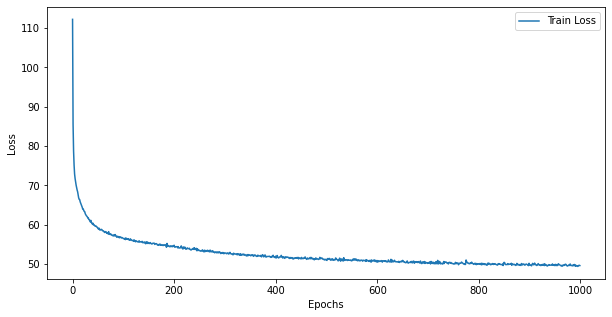

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



### TEST SUR LE TRAIN : 

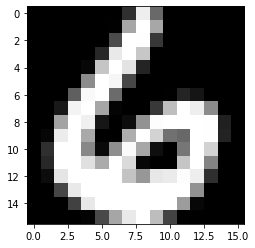

In [28]:
ut.show_usps(datax[:10][0])

In [29]:
resultat_train = optimiser._net.forward(datax)

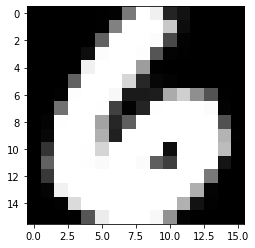

In [30]:
ut.show_usps(resultat_train[:10][0])

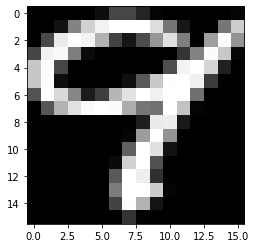

In [31]:

ut.show_usps(datax[datay_adapted==1][199])


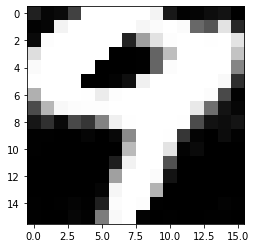

In [32]:
#Prediction sur l'ensemble de train :
ut.show_usps(resultat_train[datay_adapted==1][199])

### TEST SUR LE TEST :

In [33]:
resulta_test = optimiser._net.forward(testx)

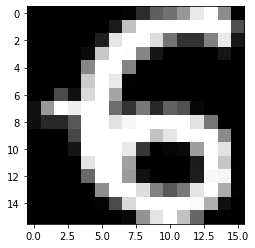

In [34]:
ut.show_usps(testx[19])

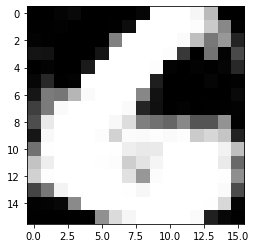

In [35]:
ut.show_usps(resulta_test[19])


# Visualisation des images obtenues : 

## BCE : 

In [ ]:
# Fonction de coût 
loss_bce = BCELoss()


# Prametres de l'optimiser
batch_size = 20
epochs = 1000
eps = 1e-3

module1 = Module_lineare(input_size=256, output_size=100,biais=True)
activation_tanh = nl.TanH()
module2 = Module_lineare(input_size=100, output_size=10,biais=True)
activation_tanh_2 = nl.TanH()

module3 = Module_lineare(input_size=10, output_size=100,biais=True)
activation_tanh_3 = nl.TanH()
module4 = Module_lineare(input_size=100, output_size=256,biais=True)
activation_sigmoide = nl.Sigmoide()

encodeur = Sequentiel([module1 , activation_tanh , module2 ,activation_tanh_2,module3 , activation_tanh_3 , module4 ,activation_sigmoide])
# decodeur = Sequentiel([module3 , activation_tanh_3 , module4 ,activation_sigmoide])


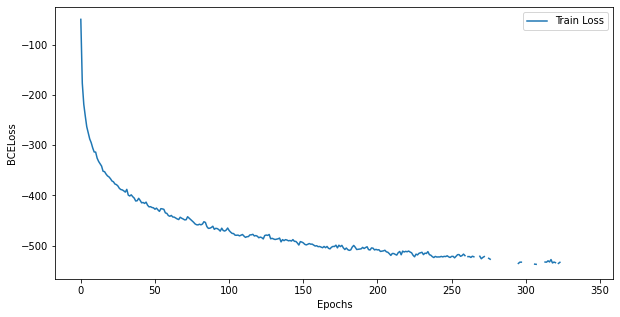

In [15]:

optimiser = Optim(encodeur , loss_bce , eps = eps)
lossesbce = optimiser.SGD(datax , datax , batch_size , epochs)


plt.figure(figsize=(10, 5))
plt.plot(lossesbce, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('BCELoss')
plt.legend()
plt.show()



### TEST SUR LE TRAIN : 

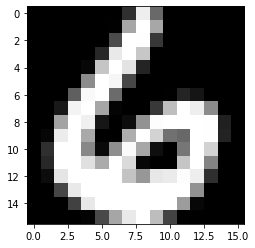

In [16]:
ut.show_usps(datax[0])

In [17]:
resultat_train = optimiser._net.forward(datax)

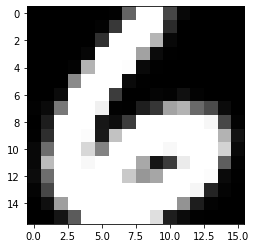

In [18]:
ut.show_usps(resultat_train[0])

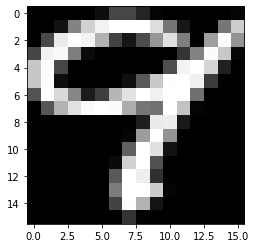

In [19]:

ut.show_usps(datax[datay_adapted==1][199])


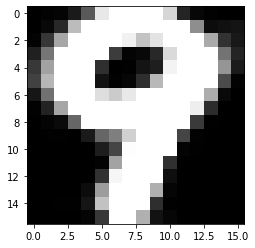

In [20]:
#Prediction sur l'ensemble de train :
ut.show_usps(resultat_train[datay_adapted==1][199])

### TEST SUR LE TEST :

In [21]:
resulta_test = optimiser._net.forward(testx)

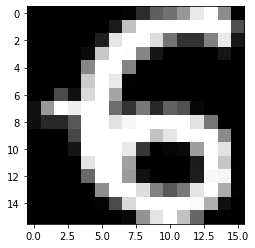

In [22]:
ut.show_usps(testx[19])

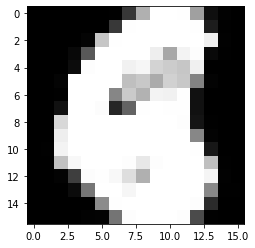

In [23]:
ut.show_usps(resulta_test[19])


## Clustering avec Kmeans et visualisation des représentations obtenues dans un espace 2D ou 3D avec une TSN-e:

In [39]:

#For standardising the dat
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### En utilisant 2 classes : 

In [60]:

# Application de l'algorithme de KMeans
kmeans_2_clusters = KMeans(init="k-means++", n_clusters=2,random_state=42)

kmeans_2_clusters.fit(datax)

# Réduction de la dimensionnalité avec T-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(datax)



In [61]:
y_pred = kmeans_2_clusters.labels_
ut.prefomance_en_clustering(y_pred,datay)

Adjusted Rand Index: 0.9696295326700607
Adjusted Mutual Information: 0.9352115984083375
Completeness Score: 0.9352473755850604
Homogeneity Score: 0.9352473755850604
V-measure Score: 0.9352473755850604


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


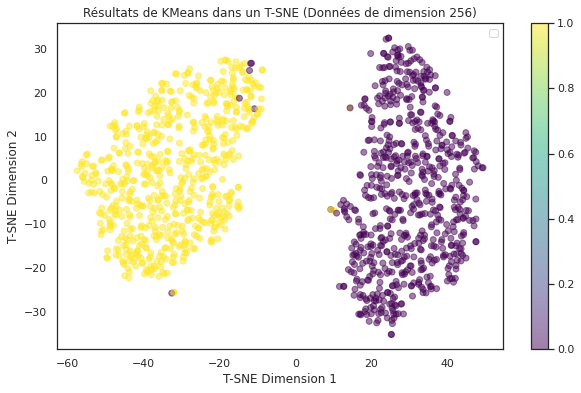

In [62]:
# Visualisation des clusters
plt.figure(figsize=(10, 6))

# Affichage des points en fonction des clusters obtenus par KMeans
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_2_clusters.labels_, cmap='viridis', alpha=0.5)


plt.title('Résultats de KMeans dans un T-SNE (Données de dimension 256)')
plt.xlabel('T-SNE Dimension 1')
plt.ylabel('T-SNE Dimension 2')
plt.legend()
plt.colorbar()
plt.show()

### En utilisant toutes les classes de chiffres : 

In [63]:

# Application de l'algorithme de KMeans
kmeans_10_clusters = KMeans(init="k-means++", n_clusters=10,random_state=42)

kmeans_10_clusters.fit(alltrainx)

# Réduction de la dimensionnalité avec T-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(alltrainx)



In [65]:
y_pred = kmeans_10_clusters.labels_
ut.prefomance_en_clustering(y_pred,alltrainy)

Adjusted Rand Index: 0.5582120791731398
Adjusted Mutual Information: 0.6375685784420654
Completeness Score: 0.6371908806034988
Homogeneity Score: 0.6397273787371017
V-measure Score: 0.6384566103928389


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


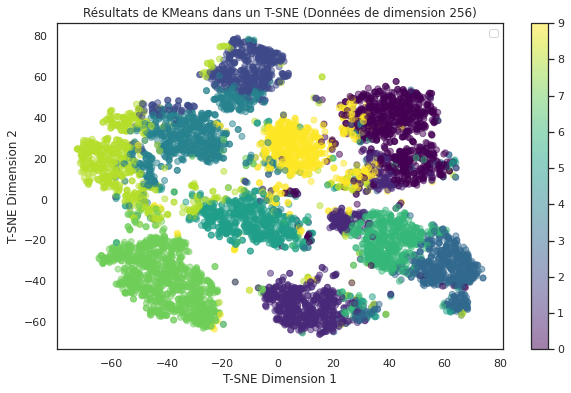

In [64]:


# Visualisation des clusters
plt.figure(figsize=(10, 6))

# Affichage des points en fonction des clusters obtenus par KMeans
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_10_clusters.labels_, cmap='viridis', alpha=0.5)


plt.title('Résultats de KMeans dans un T-SNE (Données de dimension 256)')
plt.xlabel('T-SNE Dimension 1')
plt.ylabel('T-SNE Dimension 2')
plt.legend()
plt.colorbar()
plt.show()

## Experimentations : 

In [4]:
alltrainx.shape

(7291, 256)

In [5]:

# Fonction de coût 
loss_bce = BCELoss()


# Prametres de l'optimiser
batch_size = 100
epochs = 1000
eps = 1e-3

module1 = Module_lineare(input_size=256, output_size=50,biais=True)
activation_tanh = nl.TanH()
module2 = Module_lineare(input_size=50, output_size=10,biais=True)
activation_tanh_2 = nl.TanH()

module3 = Module_lineare(input_size=10, output_size=50,biais=True)
activation_tanh_3 = nl.TanH()
module4 = Module_lineare(input_size=50, output_size=256,biais=True)
activation_sigmoide = nl.Sigmoide()

auto_encodeur_2 = Sequentiel([module1 , activation_tanh , module2 ,activation_tanh_2,module3 , activation_tanh_3 , module4 ,activation_sigmoide])
# decodeur = Sequentiel([module3 , activation_tanh_3 , module4 ,activation_sigmoide])


In [8]:
optimiser_2 = Optim(auto_encodeur_2 , loss_bce , eps = eps)
lossesbce_2 = optimiser_2.SGD(alltrainx , alltrainx , batch_size , epochs)




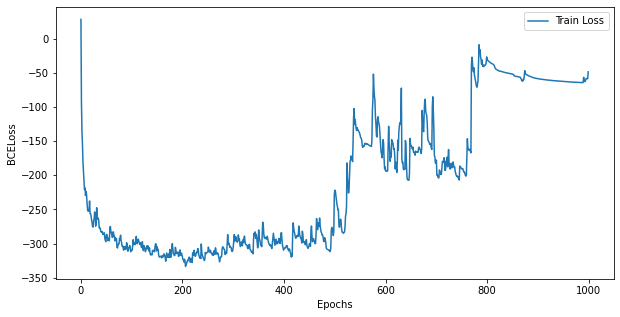

In [9]:
plt.figure(figsize=(10, 5))

plt.plot(lossesbce_2, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('BCELoss')
plt.legend()
plt.show()

In [10]:
resulta_test_2 = optimiser_2._net.forward(testx)

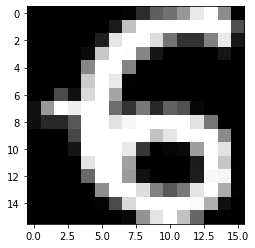

In [11]:
ut.show_usps(testx[19])

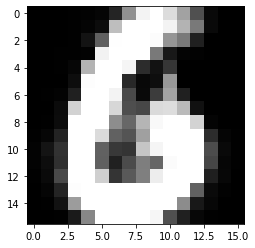

In [12]:
ut.show_usps(resulta_test_2[19])


## AJustement du modéle et recherche des parametres optimaux : 

In [76]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error



# Définition de l'espace des hyperparamètres à explorer
param_dist = {
    'hidden_layer_sizes': [50,100,200],
    'activation': [nl.Sigmoide(),nl.TanH() ],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size' : [32,50],
    'epochs' : [200,500,1000]
}

# Création de l'objet RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=optimiser_2._net, param_distributions=param_dist, n_iter=10, cv=3)

# Recherche aléatoire des hyperparamètres
random_search.fit(datax, datay)

# Affichage des meilleurs hyperparamètres et de la meilleure perte de reconstruction
print("Meilleurs hyperparamètres trouvés:", random_search.best_params_)
print("Meilleure perte de reconstruction:", random_search.best_score_)

# Évaluation du modèle sur l'ensemble de test
best_model = random_search.best_estimator_
y_pred = best_model.predict(testx)
mse = mean_squared_error(testx, y_pred)
print("Perte de reconstruction sur l'ensemble de test:", mse)


InvalidParameterError: The 'estimator' parameter of RandomizedSearchCV must be an object implementing 'fit'. Got <sequentiel.Sequentiel object at 0x7fd341a17730> instead.

# Multi classes : 

In [ ]:
# Fonction de coût 
loss_bce = BCELoss()


# Prametres de l'optimiser
batch_size = 20
epochs = 1000
eps = 1e-3

module1 = Module_lineare(input_size=256, output_size=100,biais=True)
activation_tanh = nl.TanH()
module2 = Module_lineare(input_size=100, output_size=10,biais=True)
activation_tanh_2 = nl.TanH()

module3 = Module_lineare(input_size=10, output_size=100,biais=True)
activation_tanh_3 = nl.TanH()
module4 = Module_lineare(input_size=100, output_size=256,biais=True)
activation_sigmoide = nl.Sigmoide()

encodeur = Sequentiel([module1 , activation_tanh , module2 ,activation_tanh_2,module3 , activation_tanh_3 , module4 ,activation_sigmoide])
# decodeur = Sequentiel([module3 , activation_tanh_3 , module4 ,activation_sigmoide])


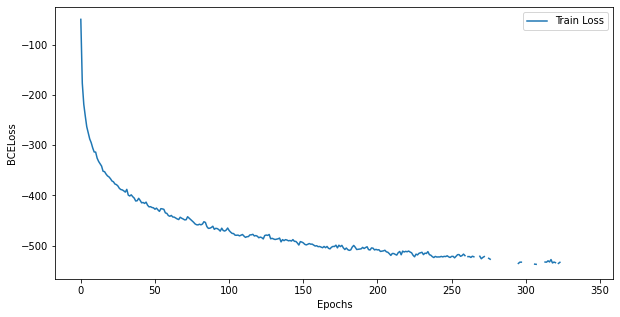

In [ ]:

optimiser = Optim(encodeur , loss_bce , eps = eps)
lossesbce = optimiser.SGD(alltrainx , alltrainx , batch_size , epochs)


plt.figure(figsize=(10, 5))
plt.plot(lossesbce, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('BCELoss')
plt.legend()
plt.show()



### TEST SUR LE TRAIN : 

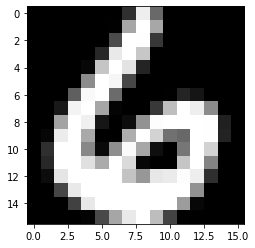

In [ ]:
ut.show_usps(alltestx[:10][0])

In [ ]:
resultat_train = optimiser._net.forward(alltrainx)

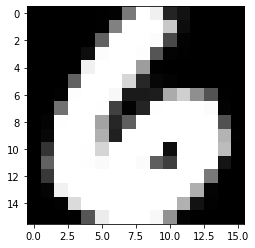

In [ ]:
ut.show_usps(resultat_train[:10][0])

### TEST SUR LE TEST :

In [ ]:
resulta_test = optimiser._net.forward(alltestx)

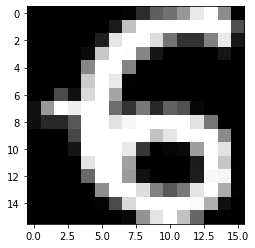

In [ ]:
ut.show_usps(alltestx[19])

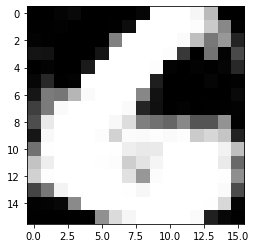

In [ ]:
ut.show_usps(resulta_test[19])


# Multi classes #RACHA: 

In [1]:
# Fonction de coût 
from modele import Module_lineare
from modele import Module
from sequentiel import Sequentiel , Optim
from loss  import MSELoss,BCELoss
import utils as ut
import numpy as np
import matplotlib.pyplot as plt

import non_lineaire as nl
from sklearn.model_selection import train_test_split
loss_bce = BCELoss()


# Prametres de l'optimiser
batch_size = 100
epochs = 2000
eps = 1e-3

module1 = Module_lineare(input_size=256, output_size=50,biais=True)
activation_tanh = nl.TanH()
module2 = Module_lineare(input_size=50, output_size=10,biais=True)
activation_tanh_2 = nl.TanH()

module3 = Module_lineare(input_size=10, output_size=50,biais=True)
activation_tanh_3 = nl.TanH()
module4 = Module_lineare(input_size=50, output_size=256,biais=True)
activation_sigmoide = nl.Sigmoide()

encodeur = Sequentiel([module1 , activation_tanh , module2 ,activation_tanh_2,module3 , activation_tanh_3 , module4 ,activation_sigmoide])
# decodeur = Sequentiel([module3 , activation_tanh_3 , module4 ,activation_sigmoide])


ModuleNotFoundError: No module named 'modele'

/home/djeghali/M1DAC/S2/ML/PROJET/ML_Reseau_de_Neurone/Test/../loss.py:30: RuntimeWarning: divide by zero encountered in log
  return - np.sum(y*np.log(yhat) + (1-y)*np.log(1-yhat) , axis=1 , keepdims=True)
/home/djeghali/.local/lib/python3.8/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/djeghali/M1DAC/S2/ML/PROJET/ML_Reseau_de_Neurone/Test/../loss.py:30: RuntimeWarning: invalid value encountered in multiply
  return - np.sum(y*np.log(yhat) + (1-y)*np.log(1-yhat) , axis=1 , keepdims=True)
/home/djeghali/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


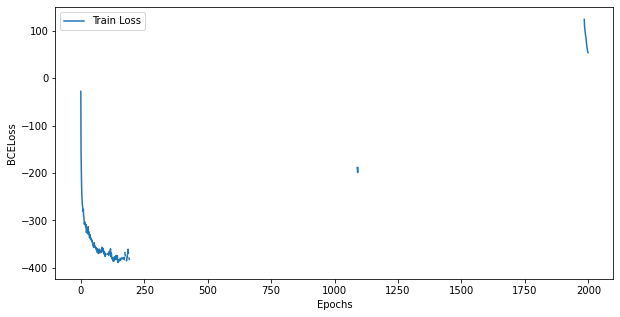

In [ ]:

optimiser = Optim(encodeur , loss_bce , eps = eps)
lossesbce = optimiser.SGD(alltrainx , alltrainx , batch_size , epochs)


plt.figure(figsize=(10, 5))
plt.plot(lossesbce, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('BCELoss')
plt.legend()
plt.show()



### TEST SUR LE TRAIN : 

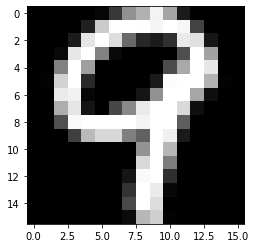

In [ ]:
ut.show_usps(alltestx[:10][0])

In [ ]:
resultat_train = optimiser._net.forward(alltrainx)

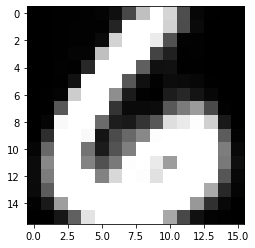

In [ ]:
ut.show_usps(resultat_train[:10][0])

### TEST SUR LE TEST :

In [ ]:
resulta_test = optimiser._net.forward(alltestx)

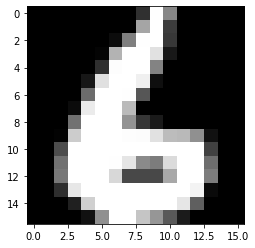

In [ ]:
ut.show_usps(alltestx[19])

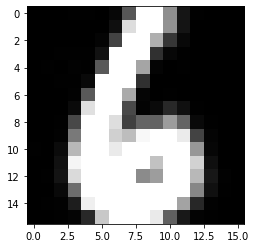

In [ ]:
ut.show_usps(resulta_test[19])


## Encore un test : 

In [ ]:
# Fonction de coût 
from modele import Module_lineare
from modele import Module
from sequentiel import Sequentiel , Optim
from loss  import MSELoss,BCELoss
import utils as ut
import numpy as np
import matplotlib.pyplot as plt

import non_lineaire as nl
from sklearn.model_selection import train_test_split
loss_bce = BCELoss()


# Prametres de l'optimiser
batch_size = 100
epochs = 1000
eps = 1e-3

module1 = Module_lineare(input_size=256, output_size=50,biais=True)
activation_tanh = nl.TanH()
module2 = Module_lineare(input_size=50, output_size=10,biais=True)
activation_tanh_2 = nl.TanH()

module3 = Module_lineare(input_size=10, output_size=50,biais=True)
activation_tanh_3 = nl.TanH()
module4 = Module_lineare(input_size=50, output_size=256,biais=True)
activation_sigmoide = nl.Sigmoide()

auto_encodeur_2 = Sequentiel([module1 , activation_tanh , module2 ,activation_tanh_2,module3 , activation_tanh_3 , module4 ,activation_sigmoide])
# decodeur = Sequentiel([module3 , activation_tanh_3 , module4 ,activation_sigmoide])


In [ ]:
optimiser_2 = Optim(auto_encodeur_2 , loss_bce , eps = eps)
lossesbce_2 = optimiser_2.SGD(alltrainx , alltrainx , batch_size , epochs)



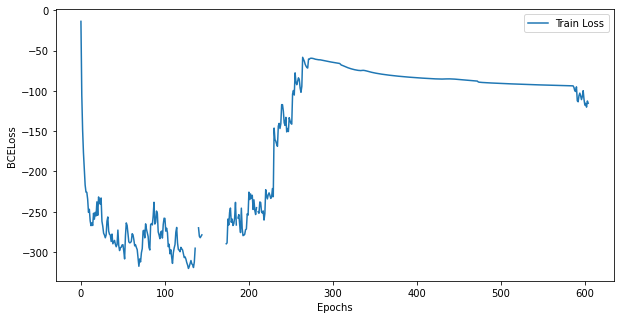

In [ ]:

plt.figure(figsize=(10, 5))

plt.plot(lossesbce_2, label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('BCELoss')
plt.legend()
plt.show()

In [ ]:
resulta_test_2 = optimiser_2._net.forward(alltestx)

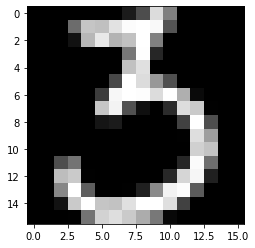

In [ ]:
ut.show_usps(alltestx[500])

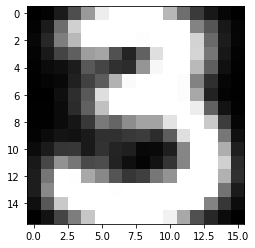

In [ ]:
ut.show_usps(resulta_test_2[500])
